In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas as pd
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from tqdm import tqdm
import numpy as np
import pandas as pd

#Importing data
df = pd.read_csv('dataset1.csv')
#consider only the first 7500 rows 
df = df[7500:]
len(df)
train = df[0:10950]
test = df[10950:]

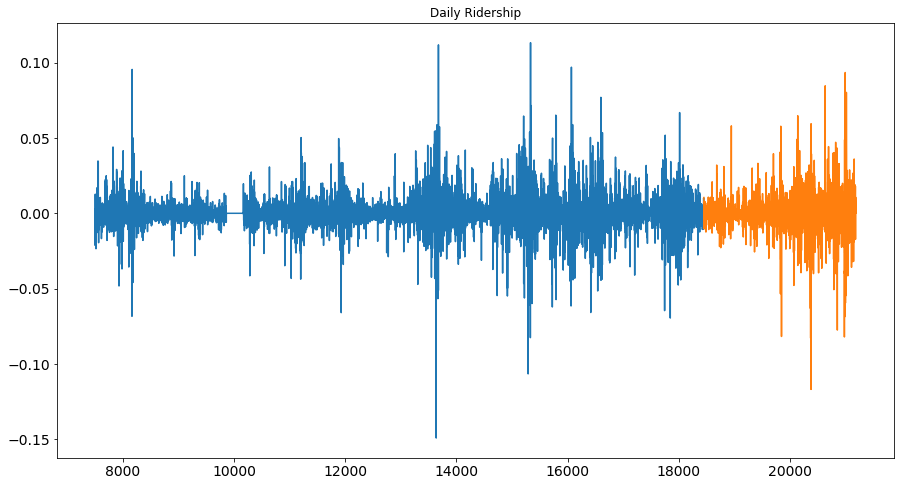

In [4]:
train.log_ret.plot(figsize=(15,8), title= 'lul', fontsize=14)
test.log_ret.plot(figsize=(15,8), title= 'lul', fontsize=14)
plt.show()

In [5]:
# naive approach 

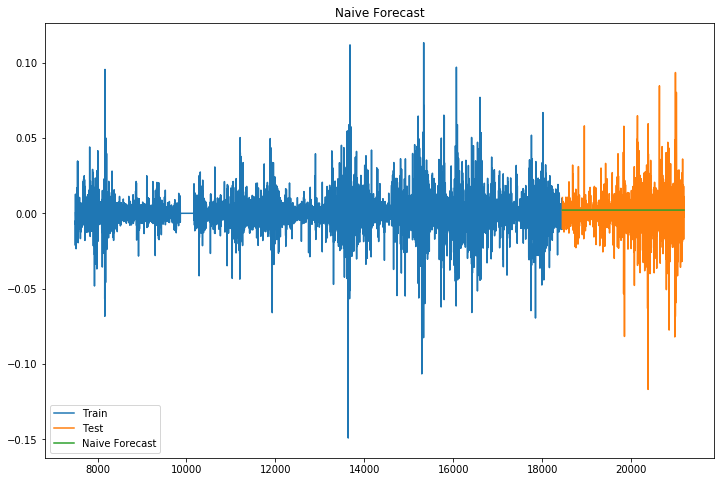

In [6]:
dd= np.asarray(train.log_ret)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['log_ret'], label='Train')
plt.plot(test.index,test['log_ret'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [7]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.log_ret, y_hat.naive))
print(rms)

0.012711284121023566


In [8]:
#simle exponential smoothing

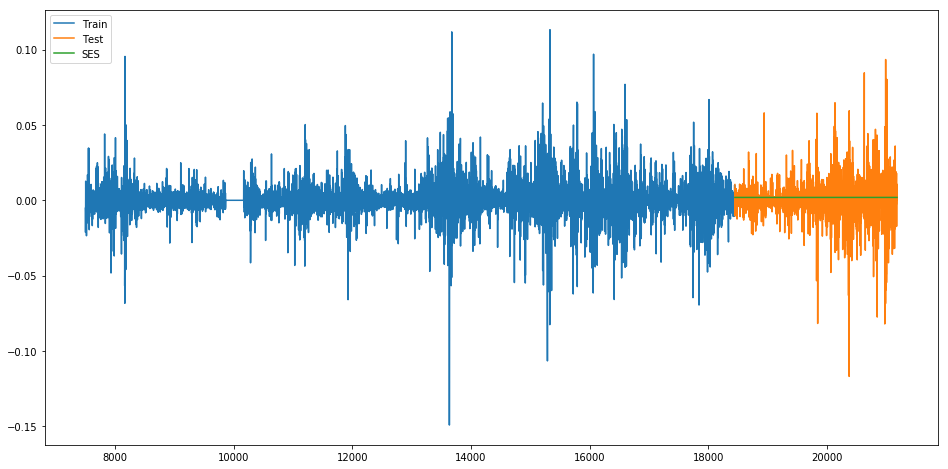

In [13]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['log_ret'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['log_ret'], label='Train')
plt.plot(test['log_ret'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [14]:
rms = sqrt(mean_squared_error(test.log_ret, y_hat_avg.SES))
print(rms)

0.012682530039259251


In [18]:

y_hat_avg = test.copy()
fit1 = statsmodels.tsa.statespace.SARIMAX(train.log_ret, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2013-11-1", end="2013-12-31", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

AttributeError: module 'statsmodels.tsa.statespace' has no attribute 'SARIMAX'

Test RMSE: 0.00264320
16947
Test RMSE: 0.00188727
16947
Test RMSE: 0.00155637
16947
Test RMSE: 0.00317515
16947
Test RMSE: 0.00284002
16947
Test RMSE: 0.00259683
16947
Test RMSE: 0.00240715
16947
Test RMSE: 0.00369884
16947
Test RMSE: 0.00685838
16947
Test RMSE: 0.00797972
16947
Test RMSE: 0.00790629
16947
Test RMSE: 0.00758773
16947
Test RMSE: 0.00729183
16947
Test RMSE: 0.00703612
16947
Test RMSE: 0.00680551
16947
Test RMSE: 0.00660137
16947
Test RMSE: 0.00642698
16947
Test RMSE: 0.00624721
16947
Test RMSE: 0.00608534
16947
Test RMSE: 0.00593139
16947
Test RMSE: 0.00581446
16947
Test RMSE: 0.00626619
16947
Test RMSE: 0.00615358
16947
Test RMSE: 0.00604324
16947
Test RMSE: 0.00595320
16947
Test RMSE: 0.00586090
16947
Test RMSE: 0.00576519
16947
Test RMSE: 0.00568737
16947
Test RMSE: 0.00559865
16947
Test RMSE: 0.00550573
16947
Test RMSE: 0.00542184
16947
Test RMSE: 0.00533647
16947
Test RMSE: 0.00527834
16947
Test RMSE: 0.00520098
16947
Test RMSE: 0.00513622
16947
Test RMSE: 0.0050816

Test RMSE: 0.00627876
16947
Test RMSE: 0.00627386
16947
Test RMSE: 0.00626851
16947
Test RMSE: 0.00626366
16947
Test RMSE: 0.00625851
16947
Test RMSE: 0.00625357
16947
Test RMSE: 0.00624857
16947
Test RMSE: 0.00624418
16947
Test RMSE: 0.00623892
16947
Test RMSE: 0.00624174
16947
Test RMSE: 0.00623680
16947
Test RMSE: 0.00623359
16947
Test RMSE: 0.00623838
16947
Test RMSE: 0.00628176
16947
Test RMSE: 0.00628328
16947
Test RMSE: 0.00628174
16947
Test RMSE: 0.00627719
16947
Test RMSE: 0.00627223
16947
Test RMSE: 0.00626705
16947
Test RMSE: 0.00627221
16947
Test RMSE: 0.00626729
16947
Test RMSE: 0.00626212
16947
Test RMSE: 0.00625834
16947
Test RMSE: 0.00633203
16947
Test RMSE: 0.00636973
16947
Test RMSE: 0.00636789
16947
Test RMSE: 0.00636289
16947
Test RMSE: 0.00636627
16947
Test RMSE: 0.00642526
16947
Test RMSE: 0.00647808
16947
Test RMSE: 0.00647294
16947
Test RMSE: 0.00649552
16947
Test RMSE: 0.00650846
16947
Test RMSE: 0.00650662
16947
Test RMSE: 0.00650148
16947
Test RMSE: 0.0064963

Test RMSE: 0.01032282
16947
Test RMSE: 0.01031855
16947
Test RMSE: 0.01031506
16947
Test RMSE: 0.01031066
16947
Test RMSE: 0.01030934
16947
Test RMSE: 0.01030516
16947
Test RMSE: 0.01030595
16947
Test RMSE: 0.01030224
16947
Test RMSE: 0.01029787
16947
Test RMSE: 0.01031132
16947
Test RMSE: 0.01031563
16947
Test RMSE: 0.01031141
16947
Test RMSE: 0.01030804
16947
Test RMSE: 0.01030984
16947
Test RMSE: 0.01030593
16947
Test RMSE: 0.01030158
16947
Test RMSE: 0.01029818
16947
Test RMSE: 0.01029440
16947
Test RMSE: 0.01029055
16947
Test RMSE: 0.01028655
16947
Test RMSE: 0.01028223
16947
Test RMSE: 0.01027839
16947
Test RMSE: 0.01027460
16947
Test RMSE: 0.01027030
16947
Test RMSE: 0.01026606
16947
Test RMSE: 0.01026190
16947
Test RMSE: 0.01025855
16947
Test RMSE: 0.01025625
16947
Test RMSE: 0.01025579
16947
Test RMSE: 0.01025151
16947
Test RMSE: 0.01025083
16947
Test RMSE: 0.01024726
16947
Test RMSE: 0.01024832
16947
Test RMSE: 0.01024485
16947
Test RMSE: 0.01028235
16947
Test RMSE: 0.0102815

Test RMSE: 0.01245948
16947
Test RMSE: 0.01245593
16947
Test RMSE: 0.01250420
16947
Test RMSE: 0.01250804
16947
Test RMSE: 0.01250834
16947
Test RMSE: 0.01250542
16947
Test RMSE: 0.01250276
16947
Test RMSE: 0.01252208
16947
Test RMSE: 0.01253515
16947
Test RMSE: 0.01253639
16947
Test RMSE: 0.01253703
16947
Test RMSE: 0.01253415
16947
Test RMSE: 0.01256614
16947
Test RMSE: 0.01256261
16947
Test RMSE: 0.01256326
16947
Test RMSE: 0.01256241
16947
Test RMSE: 0.01258716
16947
Test RMSE: 0.01258382
16947
Test RMSE: 0.01258042
16947
Test RMSE: 0.01257699
16947
Test RMSE: 0.01257388
16947
Test RMSE: 0.01257174
16947
Test RMSE: 0.01257011
16947
Test RMSE: 0.01258037
16947
Test RMSE: 0.01257819
16947
Test RMSE: 0.01257506
16947
Test RMSE: 0.01260599
16947
Test RMSE: 0.01260888
16947
Test RMSE: 0.01264799
16947
Test RMSE: 0.01265538
16947
Test RMSE: 0.01265189
16947
Test RMSE: 0.01266523
16947
Test RMSE: 0.01279192
16947
Test RMSE: 0.01279682
16947
Test RMSE: 0.01279499
16947
Test RMSE: 0.0127974

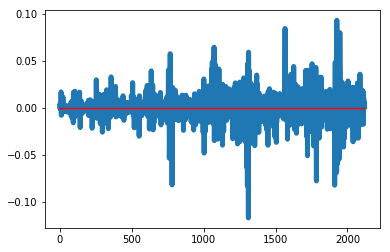

In [3]:

df = pd.read_csv('dataset1.csv')
#consider only the first 7500 rows 
len(df)

df = df['log_ret'].values
size = int(len(df) * 0.8)
train, test = df[0:size], df[int(len(df) * 0.9):len(df)]
listrep = [x for x in train]
predictions = list()

for t in (range(1,len(test))):
    model = ARIMA(listrep, order=(5,0,1))
    model_fit = model.fit(disp=1)
    output = model_fit.forecast()
    yout = output[0]
    predictions.append(yout)
    obs = test[t]
#     listrep.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
    error = sqrt(mean_squared_error(test[0:t], predictions))
    print('Test RMSE: %.8f' % error)
    print(len(listrep))
    
pyplot.plot(test[0:t], linewidth =5 )
pyplot.plot(predictions, color='red')
pyplot.show()

In [20]:
from scipy.stats import mstats
x = mstats.winsorize(listrep, limits=[0.05, 0.05])
type(x)

numpy.ma.core.MaskedArray

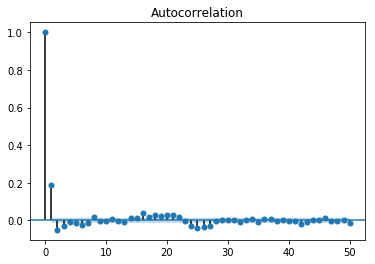

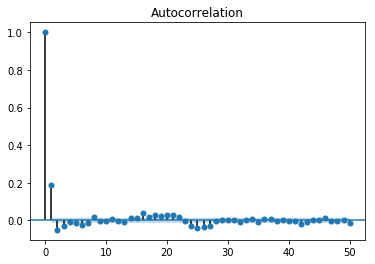

In [5]:
df = pd.read_csv('dataset1.csv')
#consider only the first 7500 rows 
len(df)

df = df['log_ret'].values

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df,lags=50)

In [15]:
print(len(df)*0.8)
print(len(listrep))

16947.2
16947


In [20]:
df = pd.read_csv('dataset1.csv')

In [23]:
df1 = df[6000:11000]
len(df1)

5000

In [1]:
import pandas as pd 
data = pd.read_csv('final5.csv')

In [12]:
log_ret = data['log_ret']
date = data['Date']

In [17]:

data = data.drop(['log_ret', 'Date'], axis=1)

In [19]:
idx = 0
new_col = log_ret  # can be a list, a Series, an array or a scalar   
data.insert(loc=idx, column='log_ret', value=new_col)

In [20]:
idx = 0
new_col = date  # can be a list, a Series, an array or a scalar   
data.insert(loc=idx, column='Date', value=new_col)

In [22]:
data.to_csv('truncatedkeras.csv',index=False)

In [38]:
import pandas as pd
import matplotlib.pyplot as plt 
df = pd.read_csv('vals.csv')


In [39]:
import math
act = df['iny_y']
pred = df['inv_yhat'] 
diff = pred-act

import numpy as np
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [40]:


rmse(pred,act)

0.014043190644128642

In [42]:
test = []
test1 = []
vals = []
for i in range(0,len(act)):
    if(abs(diff[i])>0.009):
        test.append(pred[i])
        test1.append(act[i])
        vals.append(i)

prednew = pred
# nums = [2,3,4,5,6,7,8,9,10]
# for j in range(0,len(nums)):
#     testmod = []
#     for i in test:
#         testmod.append(i * 2)

#     import matplotlib.pyplot as plt 
#     plt.plot(test1)
#     plt.plot(testmod)
#     plt.show()
    
#     print(rmse(np.array(testmod),np.array(test)))
# # best value of j is 2 

testmod = []
for i in test:
    testmod.append(i * 6)

for i in range(0,len(vals)):
     prednew[vals[i]] = testmod[i]

print(rmse(prednew,act))

0.014559934928


In [43]:
# plt.figure(figsize=(30,15))
# #plt.plot(act)
# plt.plot(prednew)
# # plt.plot(pred)

# plt.show()

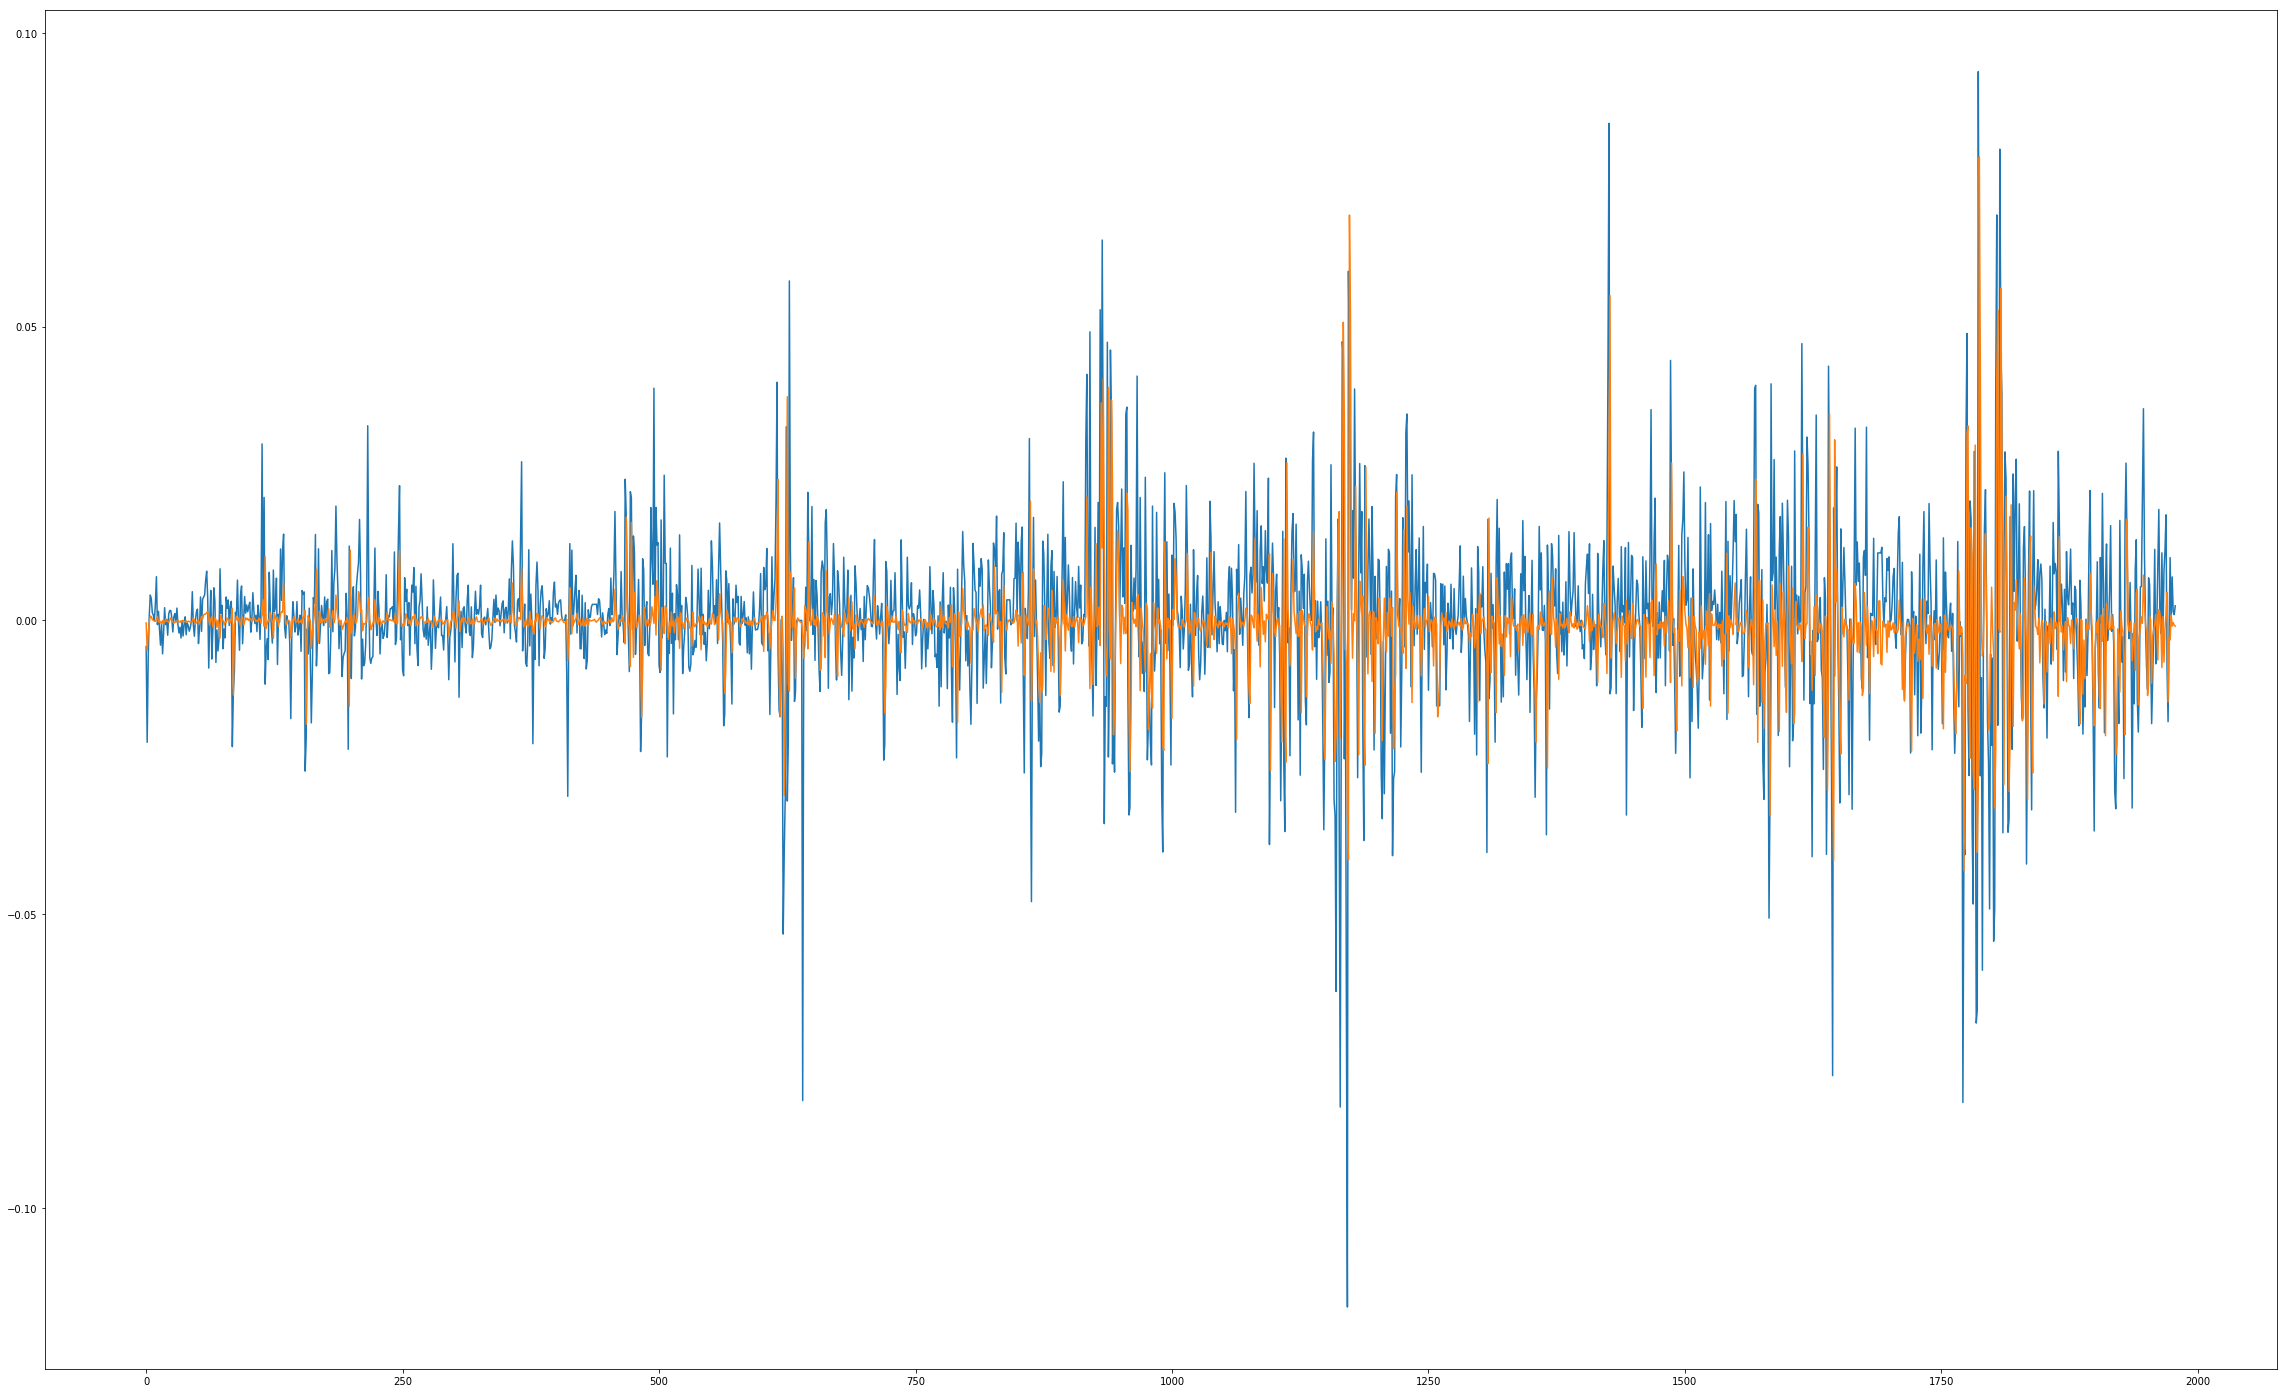

In [45]:
plt.figure(figsize=(40,25))
plt.plot(act)
plt.plot(pred)

plt.show()